Saving spam.csv to spam.csv
   label                                               text
0      0  Go until jurong point, crazy.. Available only ...
1      0                      Ok lar... Joking wif u oni...
2      1  Free entry in 2 a wkly comp to win FA Cup fina...
3      0  U dun say so early hor... U c already then say...
4      0  Nah I don't think he goes to usf, he lives aro...

Class distribution:
label
0    4825
1     747
Name: count, dtype: int64


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


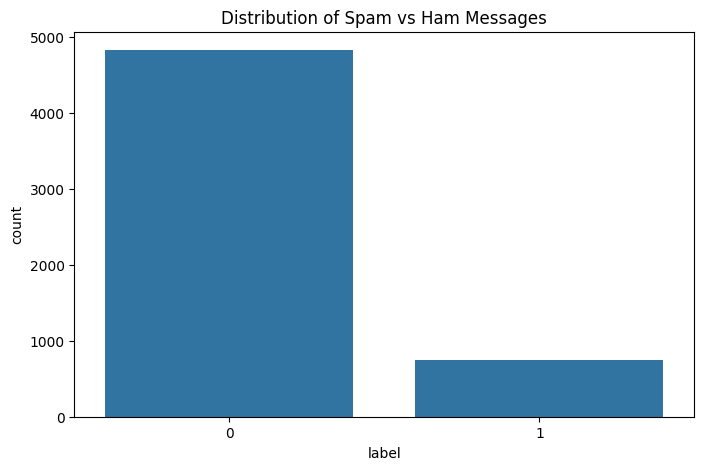

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from google.colab import files
uploaded = files.upload()
nltk.download('stopwords')


data = pd.read_csv('spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'text']


data['label'] = data['label'].map({'ham': 0, 'spam': 1})


print(data.head())
print("\nClass distribution:")
print(data['label'].value_counts())


plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=data)
plt.title('Distribution of Spam vs Ham Messages')
plt.show()

In [ ]:
import string
import re

def preprocess_text(text):

    text = text.lower()


    text = ''.join([char for char in text if char not in string.punctuation])


    text = re.sub(r'\d+', '', text)


    text = ' '.join(text.split())

    return text

data['clean_text'] = data['text'].apply(preprocess_text)


stop_words = set(stopwords.words('english'))


def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stop_words])

data['clean_text'] = data['clean_text'].apply(remove_stopwords)


print("\nOriginal text samples:")
print(data['text'].head())
print("\nCleaned text samples:")
print(data['clean_text'].head())


Original text samples:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: text, dtype: object

Cleaned text samples:
0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
Name: clean_text, dtype: object


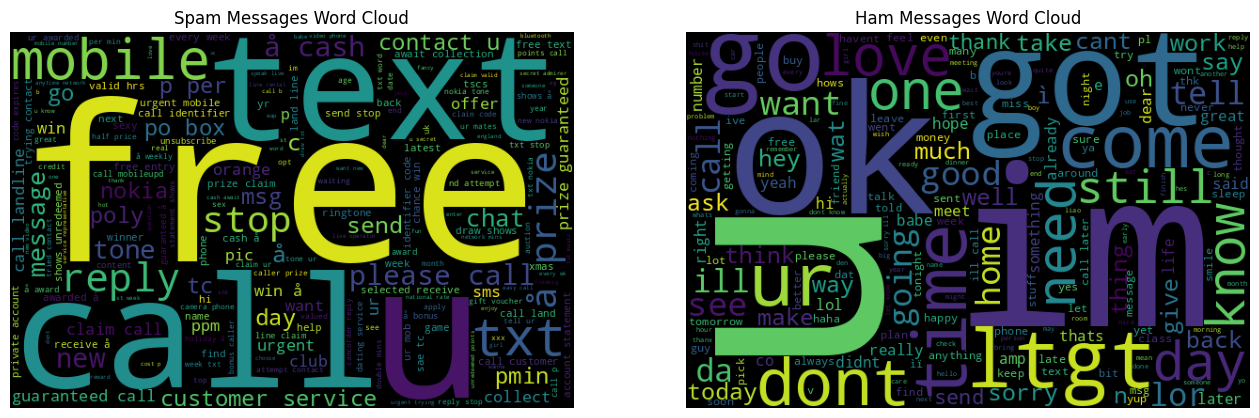

In [ ]:

spam_words = ' '.join(data[data['label'] == 1]['clean_text'])
ham_words = ' '.join(data[data['label'] == 0]['clean_text'])

plt.figure(figsize=(16, 8))


spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
plt.subplot(1, 2, 1)
plt.imshow(spam_wordcloud)
plt.title('Spam Messages Word Cloud')
plt.axis('off')


ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)
plt.subplot(1, 2, 2)
plt.imshow(ham_wordcloud)
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.show()

In [ ]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data['clean_text'], data['label'], test_size=0.2, random_state=42
)

# Create TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform train data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform test data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"Train shape: {X_train_tfidf.shape}")
print(f"Test shape: {X_test_tfidf.shape}")

Train shape: (4457, 5000)
Test shape: (1115, 5000)


Naive Bayes Classifier:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.79      0.88       150

    accuracy                           0.97      1115
   macro avg       0.98      0.90      0.93      1115
weighted avg       0.97      0.97      0.97      1115

Confusion Matrix:
[[965   0]
 [ 31 119]]
Accuracy: 0.9722



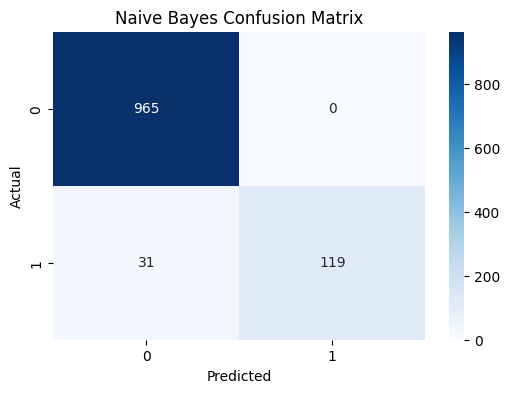

In [ ]:
# Naive Bayes
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_nb = nb_classifier.predict(X_test_tfidf)

# Evaluation
print("Naive Bayes Classifier:")
print(classification_report(y_test, y_pred_nb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))
print(f"Accuracy: {accuracy_score(y_test, y_pred_nb):.4f}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Classifier:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Confusion Matrix:
[[961   4]
 [ 49 101]]
Accuracy: 0.9525



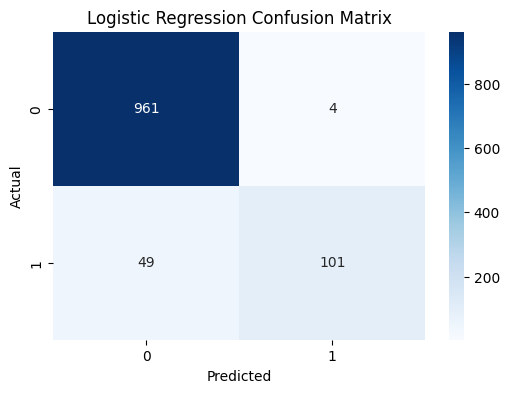

In [ ]:
# Logistic Regression
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_lr = lr_classifier.predict(X_test_tfidf)

# Evaluation
print("Logistic Regression Classifier:")
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print(f"Accuracy: {accuracy_score(y_test, y_pred_lr):.4f}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

SVM Classifier:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       965
           1       0.98      0.86      0.91       150

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.95      1115
weighted avg       0.98      0.98      0.98      1115

Confusion Matrix:
[[962   3]
 [ 21 129]]
Accuracy: 0.9785



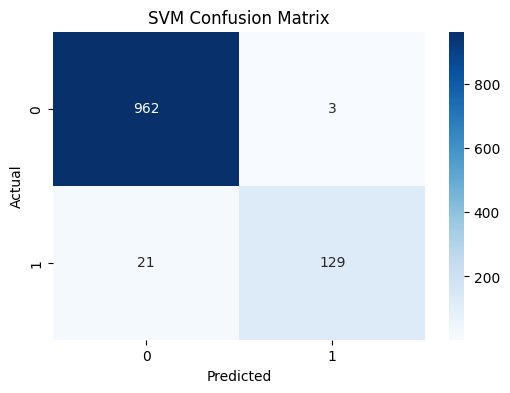

In [ ]:
# SVM
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Predictions
y_pred_svm = svm_classifier.predict(X_test_tfidf)

# Evaluation
print("SVM Classifier:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}\n")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

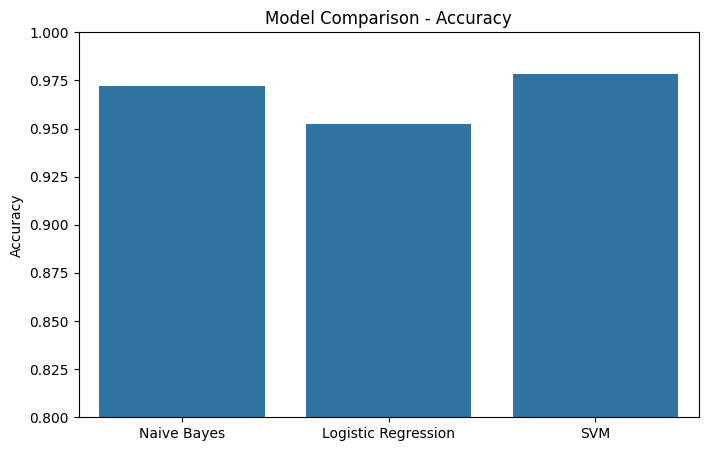


Top 20 features for spam:
txt: 4.7742
free: 3.8546
stop: 3.8469
claim: 3.8166
mobile: 3.6682
call: 3.3595
text: 3.3145
reply: 3.0377
prize: 2.8007
win: 2.6602
new: 2.5560
service: 2.5517
urgent: 2.3147
cash: 2.3064
nokia: 2.2996
per: 2.2441
chat: 2.1829
pmin: 2.1139
tone: 1.9399
tones: 1.8278

Top 20 features for ham:
ltgt: -1.9588
ok: -1.8806
ill: -1.8487
im: -1.8383
sir: -1.4784
come: -1.4035
later: -1.3942
da: -1.2757
going: -1.2512
got: -1.1952
home: -1.1940
hey: -1.1410
lor: -1.0948
way: -1.0842
sorry: -1.0816
thats: -0.9287
still: -0.9044
good: -0.9034
happy: -0.8880
right: -0.8809


In [ ]:
# Compare model accuracies
models = ['Naive Bayes', 'Logistic Regression', 'SVM']
accuracies = [
    accuracy_score(y_test, y_pred_nb),
    accuracy_score(y_test, y_pred_lr),
    accuracy_score(y_test, y_pred_svm)
]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Model Comparison - Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0.8, 1.0)
plt.show()

# Get feature importance from Logistic Regression
feature_names = tfidf_vectorizer.get_feature_names_out()
coefs = lr_classifier.coef_[0]

# Top 20 features for spam
top_spam_features = sorted(zip(coefs, feature_names), reverse=True)[:20]
print("\nTop 20 features for spam:")
for coef, feature in top_spam_features:
    print(f"{feature}: {coef:.4f}")

# Top 20 features for ham
top_ham_features = sorted(zip(coefs, feature_names))[:20]
print("\nTop 20 features for ham:")
for coef, feature in top_ham_features:
    print(f"{feature}: {coef:.4f}")

In [ ]:
from sklearn.pipeline import Pipeline

# Create a pipeline with TF-IDF and Logistic Regression
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', LogisticRegression(max_iter=1000))
])

# Fit the pipeline on the full training data
pipeline.fit(X_train, y_train)

# Evaluate on test data
y_pred_pipe = pipeline.predict(X_test)
print("\nPipeline Performance:")
print(classification_report(y_test, y_pred_pipe))
print(f"Accuracy: {accuracy_score(y_test, y_pred_pipe):.4f}")

# Example usage
test_messages = [
    "Free entry in 2 a wkly comp to win FA Cup final tkts",
    "Hey, how are you doing today?",
    "Congratulations! You've won a $1000 gift card! Click here to claim",
    "Can we meet tomorrow to discuss the project?"
]

predictions = pipeline.predict(test_messages)
for msg, pred in zip(test_messages, predictions):
    print(f"\nMessage: {msg}")
    print(f"Prediction: {'spam' if pred == 1 else 'ham'}")


Pipeline Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       965
           1       0.96      0.67      0.79       150

    accuracy                           0.95      1115
   macro avg       0.96      0.83      0.88      1115
weighted avg       0.95      0.95      0.95      1115

Accuracy: 0.9525

Message: Free entry in 2 a wkly comp to win FA Cup final tkts
Prediction: spam

Message: Hey, how are you doing today?
Prediction: ham

Message: Congratulations! You've won a $1000 gift card! Click here to claim
Prediction: ham

Message: Can we meet tomorrow to discuss the project?
Prediction: ham


In [ ]:
import joblib

# Save the pipeline
joblib.dump(pipeline, 'sms_spam_classifier.pkl')

# To load the model later:
# loaded_pipeline = joblib.load('sms_spam_classifier.pkl')

['sms_spam_classifier.pkl']

In [ ]:
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
def stem_text(text):
    return ' '.join([stemmer.stem(word) for word in text.split()])
data['clean_text'] = data['clean_text'].apply(stem_text)


from sklearn.feature_extraction.text import TfidfVectorizer
char_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(3,5))
X_train_char = char_vectorizer.fit_transform(X_train)
X_test_char = char_vectorizer.transform(X_test)


from sklearn.ensemble import RandomForestClassifier, VotingClassifier
ensemble = VotingClassifier(estimators=[
    ('nb', MultinomialNB()),
    ('lr', LogisticRegression(max_iter=1000)),
    ('svm', SVC(kernel='linear', probability=True))
], voting='soft')
ensemble.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('nb', MultinomialNB()),
                             ('lr', LogisticRegression(max_iter=1000)),
                             ('svm', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [ ]:
import joblib
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Step 1: Create and train a simple pipeline (replace with your actual model)
pipeline = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", LogisticRegression())
])

# Train with minimal dummy data (replace with your real dataset)
pipeline.fit(["Free prize", "hello friend", "Win cash now", "Meeting tomorrow"], [1, 0, 1, 0])

# Save the model
joblib.dump(pipeline, 'spam_classifier.pkl')

# Step 2: Interactive prediction loop
def predict_spam_interactive():
    loaded_pipeline = joblib.load('spam_classifier.pkl')

    print("\n🔮 Spam Classifier - Type 'quit' to exit")
    while True:
        message = input("\nEnter a message: ")
        if message.lower() == 'quit':
            break

        prediction = loaded_pipeline.predict([message])
        proba = loaded_pipeline.predict_proba([message])

        if prediction[0] == 1:
            print(f" SPAM (Confidence: {proba[0][1]:.2%})")
        else:
            print(f" HAM (Confidence: {proba[0][0]:.2%})")

# Run the interactive predictor
predict_spam_interactive()


🔮 Spam Classifier - Type 'quit' to exit
📩 HAM (Confidence: 57.04%)
🚨 SPAM (Confidence: 59.01%)
